## This is the default cleaned data that is input to the Benchmark ML model : Linear regression + ver0 clean data

In [4]:
import pandas as pd
import numpy as np

In [5]:
X_2house = pd.read_csv('/wgdisk/ho0338/ek79/Tien/X_2house_v0.csv')
X_2house=X_2house.drop(columns=['Unnamed: 0'])
X_2house.index.rename('Order', inplace=True)

In [6]:
y_2house = np.load('y_2house.npy')

## preparing the data input to ML 

In [18]:
# load the saved csv
# !head -10 /wgdisk/ho0331/ek79/Tien_DS/X_2house.csv
# X_2house = pd.read_csv('/wgdisk/ho0331/ek79/Tien_DS/X_2house.csv')

In [34]:
X_2house.head()

,Condition 2,Year Remod/Add,Exter Qual,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Gr Liv Area,BsmtFin Type 2,Bsmt Unf SF,Full Bath,...,Bsmt Unf SF_2,Full Bath_2,Half Bath_2,Kitchen AbvGr_2,Garage Cond_2,Garage Cars_2,Wood Deck SF_2,Pool QC_2,Misc Feature_2,Sale Condition_2
Order,,,,,,,,,,,,,,,,,,,,,
0,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,270.0,1.0,0.0,1.0,3.0,1.0,140.0,-1.0,0.0,3.0
1,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,406.0,1.0,1.0,1.0,3.0,1.0,393.0,-1.0,1.0,3.0
2,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,1045.0,2.0,1.0,1.0,3.0,2.0,0.0,-1.0,0.0,3.0
3,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,137.0,2.0,1.0,1.0,3.0,2.0,212.0,-1.0,0.0,3.0
4,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,324.0,2.0,1.0,1.0,3.0,2.0,360.0,-1.0,0.0,3.0


In [8]:
print('dimension of X_2house:',X_2house.shape)
print('dimension of y_2House:',y_2house.shape)
print(X_2house.columns)

dimension of X_2house: (4290985, 158)
dimension of y_2House: (4290985,)
Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       ...
       'Screen Porch_2', 'Pool Area_2', 'Pool QC_2', 'Fence_2',
       'Misc Feature_2', 'Misc Val_2', 'Mo Sold_2', 'Yr Sold_2', 'Sale Type_2',
       'Sale Condition_2'],
      dtype='object', length=158)


## Now test on 1st different way of preparing data

### policy: drop the unecessary attributes (based on previous LR and RF models)

In [9]:
col_pres=['Condition 2','Year Remod/Add','Exter Qual','Bsmt Unf SF','1st Flr SF','2nd Flr SF','Gr Liv Area','BsmtFin Type 2','Bsmt Unf SF','Full Bath','Half Bath','Kitchen AbvGr','Garage Cond','Garage Cars','Wood Deck SF','Pool QC','Misc Feature','Sale Condition']
col_pres2=[]
for item in col_pres:
    k = item+'_2'
    col_pres2.append(k)
new_col= col_pres+col_pres2
print(new_col)

['Condition 2', 'Year Remod/Add', 'Exter Qual', 'Bsmt Unf SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'BsmtFin Type 2', 'Bsmt Unf SF', 'Full Bath', 'Half Bath', 'Kitchen AbvGr', 'Garage Cond', 'Garage Cars', 'Wood Deck SF', 'Pool QC', 'Misc Feature', 'Sale Condition', 'Condition 2_2', 'Year Remod/Add_2', 'Exter Qual_2', 'Bsmt Unf SF_2', '1st Flr SF_2', '2nd Flr SF_2', 'Gr Liv Area_2', 'BsmtFin Type 2_2', 'Bsmt Unf SF_2', 'Full Bath_2', 'Half Bath_2', 'Kitchen AbvGr_2', 'Garage Cond_2', 'Garage Cars_2', 'Wood Deck SF_2', 'Pool QC_2', 'Misc Feature_2', 'Sale Condition_2']


In [10]:
X_2house=X_2house[new_col]
print(X_2house.columns)
print(len(X_2house.columns))

Index(['Condition 2', 'Year Remod/Add', 'Exter Qual', 'Bsmt Unf SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'BsmtFin Type 2',
       'Bsmt Unf SF', 'Full Bath', 'Half Bath', 'Kitchen AbvGr', 'Garage Cond',
       'Garage Cars', 'Wood Deck SF', 'Pool QC', 'Misc Feature',
       'Sale Condition', 'Condition 2_2', 'Year Remod/Add_2', 'Exter Qual_2',
       'Bsmt Unf SF_2', '1st Flr SF_2', '2nd Flr SF_2', 'Gr Liv Area_2',
       'BsmtFin Type 2_2', 'Bsmt Unf SF_2', 'Full Bath_2', 'Half Bath_2',
       'Kitchen AbvGr_2', 'Garage Cond_2', 'Garage Cars_2', 'Wood Deck SF_2',
       'Pool QC_2', 'Misc Feature_2', 'Sale Condition_2'],
      dtype='object')
36


### Set up the train-test split in sklearn

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2house, y_2house, test_size=0.5, random_state=12)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2145492, 36)
(2145492,)
(2145493, 36)
(2145493,)


In [13]:
print(type(X_train))
X_train.head(2)

<class 'pandas.core.frame.DataFrame'>


,Condition 2,Year Remod/Add,Exter Qual,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Gr Liv Area,BsmtFin Type 2,Bsmt Unf SF,Full Bath,...,Bsmt Unf SF_2,Full Bath_2,Half Bath_2,Kitchen AbvGr_2,Garage Cond_2,Garage Cars_2,Wood Deck SF_2,Pool QC_2,Misc Feature_2,Sale Condition_2
Order,,,,,,,,,,,,,,,,,,,,,
221331,2.0,1992.0,4.0,1055.0,1055.0,790.0,1845.0,1.0,1055.0,2.0,...,356.0,2.0,0.0,1.0,3.0,2.0,240.0,-1.0,0.0,3.0
4201490,2.0,2005.0,3.0,600.0,520.0,600.0,1200.0,1.0,600.0,2.0,...,485.0,1.0,0.0,1.0,3.0,1.0,394.0,-1.0,0.0,3.0


In [14]:
print(y_train[0:2])

[ -3350.  34000.]


## Setup a RF(Random Forest) model

In [16]:
from sklearn.ensemble import RandomForestRegressor
RF_model01 = RandomForestRegressor(random_state=12)

In [17]:
RF_model01.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=12, verbose=0, warm_start=False)

In [18]:
pred_train_RF = RF_model01.predict(X_train)
print('training score of RandomForest:',RF_model01.score(X_train,pred_train_RF))
pred_test_RF = RF_model01.predict(X_test)
print('test score of RandomForest:',RF_model01.score(X_test,pred_test_RF))

training score of RandomForest: 1.0
test score of RandomForest: 1.0


In [20]:
# access several benchmark RMSE for reference:
from sklearn import metrics
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train_RF))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train_RF))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test_RF))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test_RF))

MSE score(training): 45361102.8945
MAE score(training): 4371.08836222
MSE score: 236618015.703
MAE score: 10549.6366184


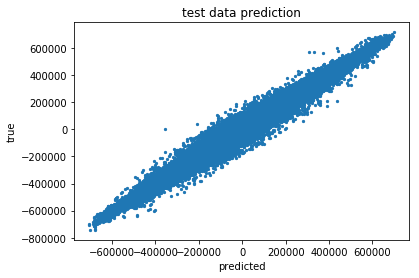

In [22]:
## Plotting the predicted price difference and the true price difference
import matplotlib.pyplot as plt
plt.scatter(pred_test_RF,y_test, s=5)
plt.title('test data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

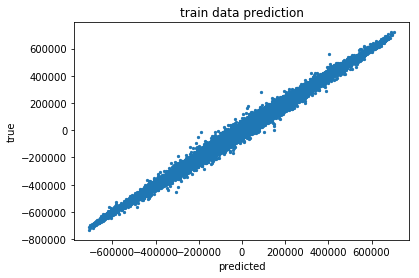

In [23]:
plt.scatter(pred_train_RF,y_train, s=5)
plt.title('train data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

Condition 2 7.85262572242e-05
Year Remod/Add 0.0204224678436
Exter Qual 0.108515602561
Bsmt Unf SF 0.00749016678184
1st Flr SF 0.0467220841469
2nd Flr SF 0.00449630321577
Gr Liv Area 0.0797001133266
BsmtFin Type 2 0.00196904944448
Bsmt Unf SF 0.00743992041258
Full Bath 0.00149941594169
Half Bath 0.00210087499341
Kitchen AbvGr 0.00289735544737
Garage Cond 0.00349429072447
Garage Cars 0.214517018973
Wood Deck SF 0.00707287822246
Pool QC 7.73632962429e-05
Misc Feature 0.000264185476614
Sale Condition 0.00244698148853
Condition 2_2 6.77730984838e-05
Year Remod/Add_2 0.0182773200733
Exter Qual_2 0.192050601727
Bsmt Unf SF_2 0.00783182746667
1st Flr SF_2 0.0586893273812
2nd Flr SF_2 0.0166704782956
Gr Liv Area_2 0.0837617331476
BsmtFin Type 2_2 0.00187490454059
Bsmt Unf SF_2 0.00777297988969
Full Bath_2 0.00203130585877
Half Bath_2 0.00145947398557
Kitchen AbvGr_2 0.003107679924
Garage Cond_2 0.00372446162308
Garage Cars_2 0.0824137050118
Wood Deck SF_2 0.00621891377652
Pool QC_2 9.469970271

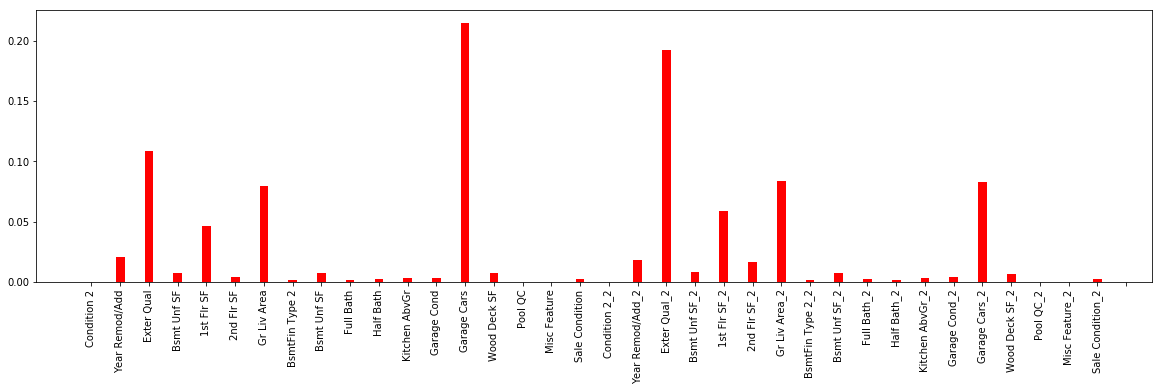

In [32]:
# Take a look at feature importance
f_importance = pd.DataFrame({'feature':new_col, 'importance':RF_model01.feature_importances_})
#plot histogram
x_tick_label=[None]*36
hist_val=np.zeros(36)
for i in range(0,36):
    hist_val[i] = f_importance.values[i][1]
    x_tick_label[i] = f_importance.values[i][0]
    print(x_tick_label[i],hist_val[i])
    
index = np.arange(36)+1
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(1, 38, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()

## Run a cross-validation to know the RF_model01 performance.

In [36]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=20)

In [37]:
k_fold.get_n_splits(X_train)
scores = np.sqrt(-1*cross_val_score(RF_model01, X_train, y_train, verbose=10, cv=20,scoring = 'neg_mean_squared_error'))
print('Cross-validated scores:', scores)

[CV]  ................................................................
[CV] ...................... , score=-236497662.39527422, total= 6.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s


[CV] ....................... , score=-243610561.6457283, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.4min remaining:    0.0s


[CV] ...................... , score=-241052219.33486265, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 16.3min remaining:    0.0s


[CV] ....................... , score=-241655954.1372458, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 21.3min remaining:    0.0s


[CV] ...................... , score=-241538549.58114433, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 26.2min remaining:    0.0s


[CV] ...................... , score=-234671760.64221364, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 31.1min remaining:    0.0s


[CV] ....................... , score=-238853430.3022286, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 36.1min remaining:    0.0s


[CV] ...................... , score=-241259562.47119445, total= 5.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 41.0min remaining:    0.0s


[CV] ....................... , score=-239484029.9642206, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 45.9min remaining:    0.0s


[CV] ....................... , score=-241215711.3955964, total= 4.9min
[CV]  ................................................................
[CV] ....................... , score=-241021071.5309559, total= 4.9min
[CV]  ................................................................
[CV] ....................... , score=-240477754.8116568, total= 4.7min
[CV]  ................................................................
[CV] ....................... , score=-241370119.3723347, total= 4.4min
[CV]  ................................................................
[CV] ....................... , score=-240583553.1137632, total= 4.4min
[CV]  ................................................................
[CV] ...................... , score=-245037622.39583308, total= 4.4min
[CV]  ................................................................
[CV] ...................... , score=-241490290.17601058, total= 4.4min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 95.3min finished


In [38]:
print('Mean Cross-validation scores of MSE:',np.mean(scores))

Mean Cross-validation scores of MSE: 15514.30282


In [39]:
from scipy import stats
stats.describe(scores)

DescribeResult(nobs=20, minmax=(15318.999988322137, 15653.677599715444), mean=15514.302820022134, variance=5034.3030656638584, skewness=-0.9900790333225264, kurtosis=1.9592859577925337)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


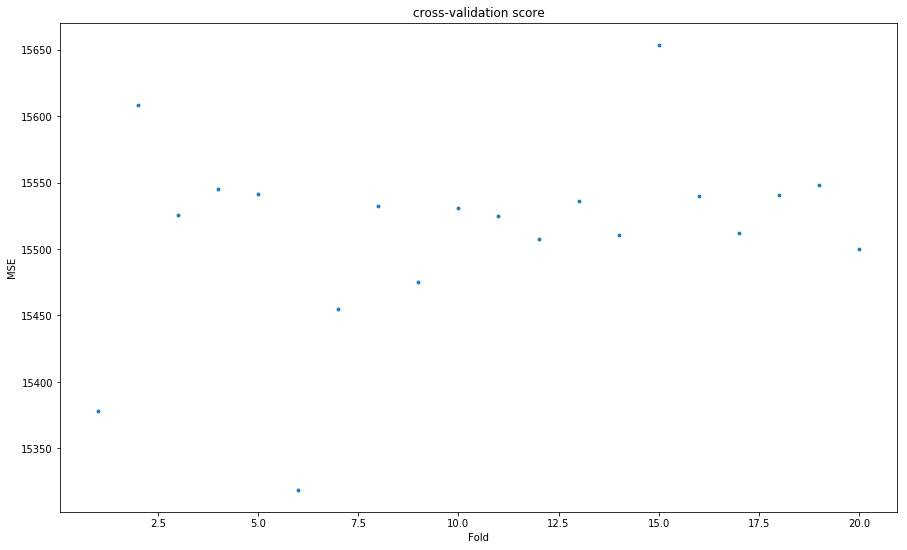

In [40]:
## Plot the variation of the cross-validation scores
stp=np.array([x for x in range(1,21)])
print(stp)
fig = plt.figure(figsize=(15,9))
ax = plt.gca()
ax.scatter(stp,scores,s=8)
plt.title('cross-validation score')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()